Explore some mathematical formulas, convert them into python code, visualize them and explore variations by changing different parameters. The whole idea is to learn how to turn mathematical formulas into code

## Pascal's Triangle

Pascal's triangle is based on binomial coefficient $\binom{n}{k}$ where n is the row index and k the colukn index. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def nChooseK(n,k):
    num = math.factorial(n)
    den = math.factorial(k) * math.factorial(n-k)
    return num/den

In [3]:
pSize = 5
PT = np.zeros((pSize, pSize), dtype = int)
for n in range(pSize):
    for k in range(n+1):
#        print(n,k)
        PT[n,k] = nChooseK(n,k)
PT

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 2, 1, 0, 0],
       [1, 3, 3, 1, 0],
       [1, 4, 6, 4, 1]])

In [4]:
# a different way
pSize = 5
PT = np.zeros((pSize, pSize), dtype = int)
for n in range(pSize):
    for k in range(n+1):
        if k > n:
            continue
#        print(n,k)
        PT[n,k] = nChooseK(n,k)
PT

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 2, 1, 0, 0],
       [1, 3, 3, 1, 0],
       [1, 4, 6, 4, 1]])

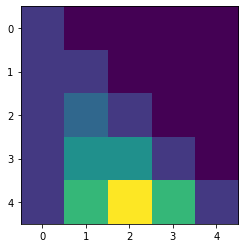

In [5]:
plt.imshow(PT)
plt.show()

In [6]:
# Print all non-zero elements from the matrix
for i in range(pSize):
    temp = PT[i,:]
    temp = temp[temp != 0]
    print(np.array2string(temp))

[1]
[1 1]
[1 2 1]
[1 3 3 1]
[1 4 6 4 1]


In [7]:
# remove paranthesis
for i in range(pSize):
    temp = PT[i,:]
    temp = temp[temp != 0]
    print(np.array2string(temp)[1:-1])

1
1 1
1 2 1
1 3 3 1
1 4 6 4 1


In [8]:
# Introduce spaces
for i in range(pSize):
    temp = PT[i,:]
    temp = temp[temp != 0]
    print(" "*(pSize - i) + np.array2string(temp)[1:-1])

     1
    1 1
   1 2 1
  1 3 3 1
 1 4 6 4 1


## Euler's Identity

Euler's Identity is expressed as: $me^{i\phi} = m(\cos(\phi) + i\sin(\phi))$, where m is any positive real number, and phi is in units of radians. This expression can also be expressed using the Cartesian Coodinates as $x = re(me*{i\phi})$ and $y = im(me^{i\phi})$ where r stands for real and i stands for imaginary

In [9]:
m = 4.3
p = np.pi/4

# Euler's notation
euler = m*np.exp(1j*p)

# rectangular notation
rect = m*(np.cos(p) + 1j*np.sin(p))

# They are equal
print(euler)
print(rect)

(3.0405591591021546+3.040559159102154j)
(3.0405591591021546+3.040559159102154j)


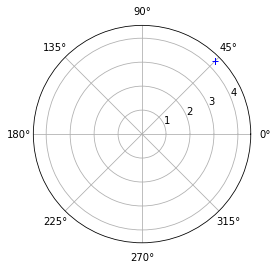

In [10]:
plt.polar(p,m, "b+")
plt.show()

In [11]:
# We can extract radius an angle from euler
theta = np.angle(euler)
radius = np.abs(euler)
print(theta)
print(radius)

0.7853981633974483
4.3


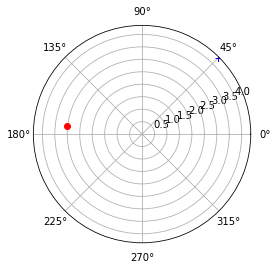

In [12]:
# This approach does not work
x = np.real(euler)
y = np.imag(euler)

plt.polar(p,m, "b+")
plt.plot(x,y, "ro")
plt.show()

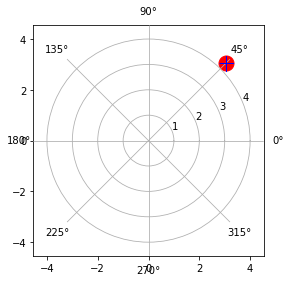

In [13]:
# To make it work we have to write code as follows

fig = plt.figure()

ax_cart = fig.add_axes([.1,.1,.8,.8])
ax_polr = fig.add_axes([.1,.1,.8,.8], polar = True, frameon = False)

# Draw two plots
ax_polr.plot(theta, radius, "b+", markersize = 15)
ax_cart.plot(x,y,"ro", markersize=15)

# Get the max radius to match the points
r = ax_polr.get_rmax()

ax_cart.set_xlim([-r,r])
ax_cart.set_ylim([-r,r])
ax_cart.set_aspect(1/ax_cart.get_data_ratio())
plt.show()

## Parametrized Gaussian

Parametrized Gaussian is written as follows: $g(\alpha, x, \sigma, \tau) = \frac{ \alpha}{\sigma \sqrt{2\pi}} \exp^{ \frac {-(x - \tau)^2}{2 \sigma^2}}$ which can be shortly written as $g(x) = e^{-x^2}$. We will implement this in code in the form of functio nto call it multiple times, and then we will plot it multiple times using different parameters.

In [14]:
# define x
x = np.linspace(-10, 10, 1001)

def makeGauss(amp, sig, tau = 0):
    g = amp/(sig*np.sqrt(2*np.pi)) * np.exp(-(x-tau)**2/(2*sig**2))
    return g

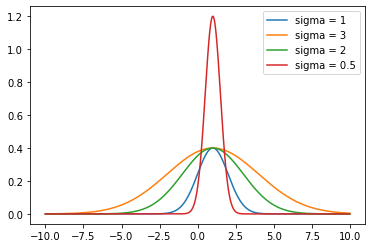

In [15]:
plt.plot(x, makeGauss(1,1,1), label = "sigma = 1")
plt.plot(x, makeGauss(3,3,1), label = "sigma = 3")
plt.plot(x, makeGauss(2,2,1), label = "sigma = 2")
plt.plot(x, makeGauss(1.5,0.5,1), label = "sigma = 0.5")
plt.legend()
plt.show()

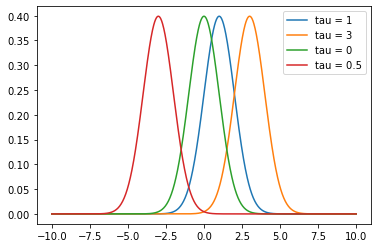

In [16]:
plt.plot(x, makeGauss(1,1,1), label = "tau = 1")
plt.plot(x, makeGauss(1,1,3), label = "tau = 3")
plt.plot(x, makeGauss(1,1), label = "tau = 0")
plt.plot(x, makeGauss(1,1,-3), label = "tau = 0.5")
plt.legend()
plt.show()

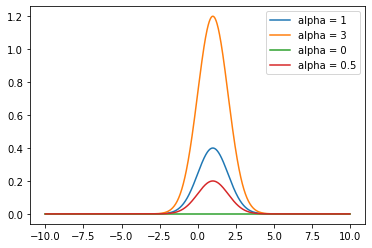

In [17]:
plt.plot(x, makeGauss(1,1,1), label = "alpha = 1")
plt.plot(x, makeGauss(3,1,1), label = "alpha = 3")
plt.plot(x, makeGauss(0,1,1), label = "alpha = 0")
plt.plot(x, makeGauss(0.5,1,1), label = "alpha = 0.5")
plt.legend()
plt.show()

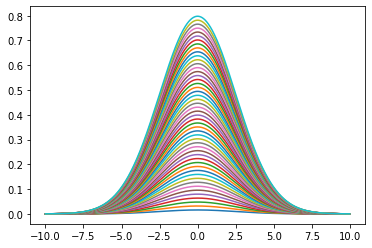

In [18]:
x = np.linspace(-10, 10, 1001)
amps = np.linspace(0.1, 5, 50)
G = np.zeros((len(amps), len(x)))

for i in range(len(amps)):
    G[i,:] = makeGauss(amps[i], 2.5)
    
plt.plot(x, G.T)
plt.show()

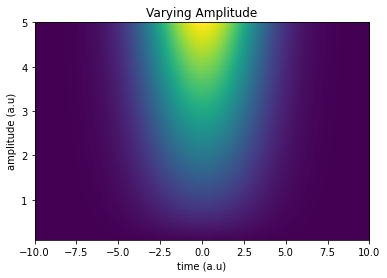

In [19]:
plt.imshow(G, aspect="auto", 
           extent = [x[0], x[-1], amps[0], amps[-1]],
           origin = "lower")
plt.xlabel("time (a.u)")
plt.ylabel("amplitude (a.u)")
plt.title("Varying Amplitude")
plt.show()

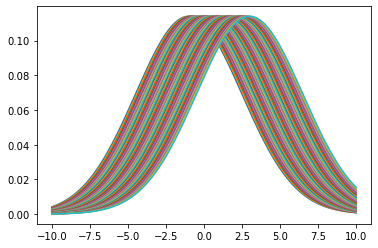

In [20]:
x = np.linspace(-10, 10, 1001)
taus = np.linspace(-1, 3, 50)
G = np.zeros((len(taus), len(x)))

for i in range(len(taus)):
    G[i,:] = makeGauss(1, 3.5, taus[i])
    
plt.plot(x, G.T)
plt.show()

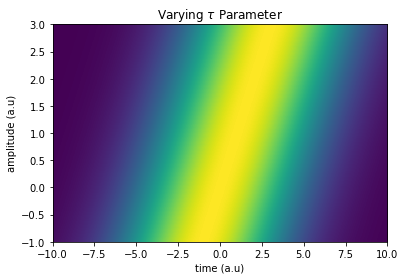

In [21]:
plt.imshow(G, aspect="auto", 
           extent = [x[0], x[-1], taus[0], taus[-1]],
           origin = "lower")
plt.xlabel("time (a.u)")
plt.ylabel("amplitude (a.u)")
plt.title("Varying $\\tau$ Parameter")
plt.show()

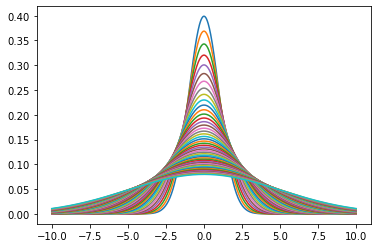

In [22]:
x = np.linspace(-10, 10, 1001)
sigma = np.linspace(1, 5, 50)
G = np.zeros((len(taus), len(x)))

for i in range(len(sigma)):
    G[i,:] = makeGauss(1,sigma[i])
    
plt.plot(x, G.T)
plt.show()

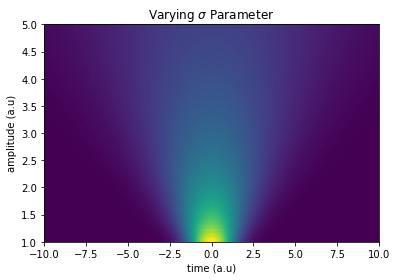

In [23]:
plt.imshow(G, aspect="auto", 
           extent = [x[0], x[-1], sigma[0], sigma[-1]],
           #vmax = 0.5,
           origin = "lower")
plt.xlabel("time (a.u)")
plt.ylabel("amplitude (a.u)")
plt.title("Varying $\\sigma$ Parameter")
plt.show()

## Time Dilation in Special Relativity

Time slows down as we approach the speed of light, and dilation of time as we approach the speed of light is described by the following formula: $\Delta t' = \frac {\Delta t}{\sqrt{1 - (v/c)^2}} $ where $ c = 299792458 m/s $. In this section we will assume $\Delta t$ to be 1 and we will calculate different $\Delta t'$ as a function of changing $v$

In [24]:
# Speeds to be used. Careful with the units
kph = np.zeros(6)

kph[0] = 100    # Car on a highway
kph[1] = 200    # Crazy People on German autobahn
kph[2] = 900    # Airplane
kph[3] = 11300  # Satellite
kph[4] = 107991 # Earth Around the Sun
kph[5] = 828000 # Solar System around the galaxy

labels = ["car", "autobahn", "plane", "satellite", "earth", "solar system"]

In [25]:
c = 299792458
timedil = lambda v: 1/np.sqrt(1 - (v**2/c**2))

In [26]:
td = np.zeros(len(kph))
for i in range(len(kph)):
    # convert kph to m/s
    v = kph[i]*1000/3600
    # compute time dilation
    td[i] = timedil(v)
td

array([1.        , 1.        , 1.        , 1.        , 1.00000001,
       1.00000029])

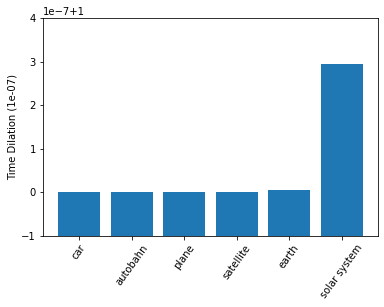

In [27]:
plt.bar(range(len(td)), td)
plt.xticks(ticks = range(len(td)), labels = labels, rotation=54)
plt.ylim([0.9999999, 1.0000004])
plt.ylabel("Time Dilation (1e-07)")
plt.show()

## Eiganvalues on the Complex Circle

We will look at the distribution of eiganvalues in a random matrix. Eigan Decomposition can be applied on mxm matrix from which we will get 15 eiganvalues and 15 eiganvectors. Here we will nly be interested in eiganvalues and see how they are complex numbers and how all of them are all located inside a unit sphere.

Some Notation: Real Value Matrix: $A \in \mathbb{R}^{mxm}$ whose individual elements are defined as $ a_{i,j} \sim N(0,m^{-1})$ (variance = 1/m). Caution with variance vs standard deviation.

We then extract all eiganvalues from the matrix and plot them into a complex plane. in order to get a better approximation, take more than 100 eiganvalues.

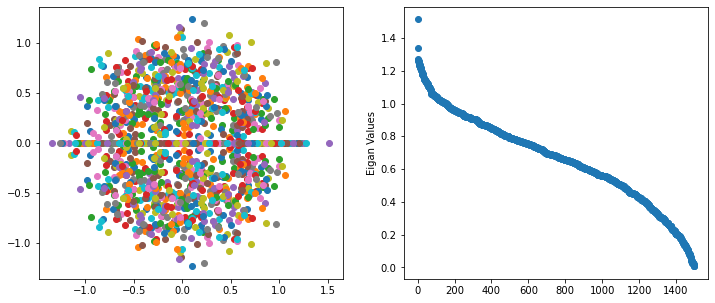

In [28]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

n = 15
mags = []
# 100 random matrices
for i in range(100):
    # Create random numbers matrix
    A = np.random.randn(n,n)/np.sqrt(n)
    L = np.linalg.eig(A)[0]
    mags = np.concatenate((mags, np.abs(L)))
    ax[0].plot(np.real(L), np.imag(L), "o")

mags.sort()
ax[1].plot(mags[::-1], "o")
ax[1].set_ylabel("Eigan Values")
plt.show()

## Bonus: I Heart Math

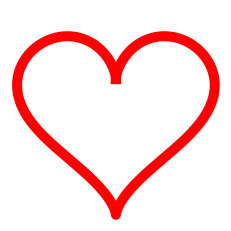

In [29]:
t = np.linspace(0, np.pi*2, 200)
x = 16*np.sin(t)**3
y = 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)

plt.plot(x,y, "r", linewidth=10)
plt.axis("square")
plt.axis("off")
plt.show()